# Part 1

Null Hypothesis (H0): The proportion of clicks for version A is equal to the proportion of clicks for version B. p_A = p_B

Alternative Hypothesis (H1): The proportion of clicks for version B is greater than the proportion for version A. p_B > p_A

In [50]:
from scipy.stats import norm

def two_proportion_z_test(clicks_A, views_A, clicks_B, views_B):
    # Proportions
    p_A = clicks_A / views_A
    p_B = clicks_B / views_B
    
    # Pooled proportion
    P = (clicks_A + clicks_B) / (views_A + views_B)
    
    # Sample sizes
    n_A = views_A
    n_B = views_B
    
    # Z-value calculation
    z_value = (p_B - p_A) / ((P * (1 - P) * (1/n_A + 1/n_B))**0.5)
    
    # P-value (1-sided)
    p_value_one_sided = 1 - norm.cdf(z_value)
    
    return z_value, p_value_one_sided

# Test data
clicks_A = 500
views_A = 1000
clicks_B = 550
views_B = 1000

# Function call
z_value, p_value_one_sided = two_proportion_z_test(clicks_A, views_A, clicks_B, views_B)

p_value_two_sided = p_value_one_sided * 2
print(f"Z-value: {z_value:.4f}")
print(f"One-sided P-value: {p_value_one_sided:.4f}")
print(f"Two-sided P-value: {p_value_two_sided:.4f}")



Z-value: 2.2389
One-sided P-value: 0.0126
Two-sided P-value: 0.0252


**Conclusions**: A P-value of 0.0126 is the probability of observing a z-value of 2.24 or more in the direction favoring B, assuming the null hypothesis is true. 

Since 0.0126 is less than 0.05, we reject the null hypothesis at the 5% significance level, suggesting that version B significantly generates more clicks than version A.

However, at 1% significance level, we fail to reject the null hypothesis based on the one-sided p-value, as it does not fall below 0.01.




# Part 2


In [51]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('realEstate1.csv')
df2 = pd.read_csv('realEstate2.csv')

# Concatenate the dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)

# Display the first few rows of the combined dataframe
display(combined_df)


,ListNo,Access,AdditInfo,Acres,ListAgt,AirType,Amenities,Area,BackDim,Basemnt,BsmntFin,City,ListCoAgt,CompBac,CompDays,CompSac,ContPh1,ContPh2,Contact,ContractDt,County,CrprtCap,DVR,DaysOnMkt,Deck,DirPre,DirPost,EWCoord,EntrdBy,EntryDt,Excl,ExpDtDisp,Ext,FeatExt,FeatInt,Floor,Frontage,GaragCap,Garage,HOAFee,HOATerms,Heat,HouseNbr,Image,Incl,Irregular,LandScape,Latitude,ListDt,ListType,Longitude,Lot,LstPrice,NSCoord,NumDish,NumDispose,NumOvRng,NumRefg,OffMktDt,ListOff,OpenHseDt,Owner,P1Bed,P1BthFull,P1BthHalf,P1BthTq,P1Fire,P1Rent,P1Sqf,P1FamDen,P1Kitch,P1Bar,P1Formal,P1SemiForm,P1Laundry,P2Bed,P2BthFull,P2BthHalf,P2BthTq,P2Fire,P2Rent,P2Sqf,P2FamDen,P2Kitch,P2Bar,P2Formal,P2SemiForm,P2Laundry,P3Bed,P3BthFull,P3BthHalf,P3BthTq,P3Fire,P3Rent,P3Sqf,P3FamDen,P3Kitch,P3Bar,P3Formal,P3SemiForm,P3Laundry,P4Bed,P4BthFull,P4BthHalf,P4BthTq,P4Fire,P4Rent,P4Sqf,P4FamDen,P4Kitch,P4Bar,P4Formal,P4SemiForm,P4Laundry,P5Bed,P5BthFull,P5BthHalf,P5BthTq,P5Fire,P5Rent,P5Sqf,P5FamDen,P5Kitch,P5Bar,P5Formal,P5SemiForm,P5Laundry,Patio,PkgSpacs,Pool,Possess,PropType,PublicID,Quadrant,RMPriceLow,ReinstDt,Remarks,Roof,Rstrct,SchDist,SchElem,SchJunior,SchSenior,SchOther,SchPrivate,Sewer,Show,SideDim,SlAgentID,SlAgentPub,SldOfcID,SlrPaidCns,SoldDt,SoldPrice,SoldTerms,StatCode,StatDate,State,Status,StrType,Street,Style,SubAgncy,Subdiv,TaxID,Taxes,Terms,TimeClause,TotAirElc,TotAirEvp,TotAirGas,TotAirPmp,TotAirSol,TotAirWElC,TotBar,TotBed,TotBth,TotBthFul,TotBthHal,TotBthTq,TotFamRm,TotFire,TotFormal,TotKitch,TotLdy,TotRent,TotSemi,TotSqf,TotWinEvp,UndrCnst,UnitNbr,Water,WinEle1,WinEle2,WinEle3,WinEle4,WinEvp1,WinEvp2,WinEvp3,WinEvp4,Window,WithDrDt,YearBlt,Zip,Zoning,LastMod
0,1397571,Concrete,NaN,0.29,Liz Slager,Central Air; Electric,See Remarks; Cable Tv Available; Cable Tv Wire...,101,0.0,Daylight; Entrance; Full; Walkout,98,Salt Lake City,,3%,1,NaN,801-412-7422,801-971-2252,Karen M-F 9-5,08/06/2016,Salt Lake,0,0,7.0,1,N,W,0,NaN,08/01/2016,Dryer; Washer,01/31/2017,Cedar/Redwood; Stone,Balcony; Deck; Covered; Double Pane Windows; E...,See Remarks; Bath: Master; Bath: Sep. Tub/Show...,Carpet; Marble; Tile,0.0,3,2 Car Deep (Tandem); Built-In; Opener,NaN,NaN,Gas: Central,451,1397571_b4ef63b3f0aab1c4497bd7596c6da1b0_23707...,See Remarks; Alarm System; Basketball Standard...,Yes,See Remarks; Landscaping: Full; Mature Trees; ...,40.779524,08/01/2016,ERS,-111.893542,See Remarks; Fenced: Part; Secluded Yard; Spri...,725000,451,0,0,0,0,00/00/0000,Coldwell Banker Residential Brokerage-Salt Lake,00/00/0000,On Record,1,2,1,0,2,0,"2,341",Y,Y,NaN,Y,Y,Y,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3,1,0,1,1,0,"3,074",Y,NaN,NaN,NaN,NaN,Y,1,0,See Remarks; Concrete/Gunite; Heated; In Groun...,Recording,Single Family,NaN,NE,0,00/00/0000,"Executive retreat! 1998, custom built home in ...",Asphalt Shingles,No,Salt Lake,Washington,Bryant,West,NaN,Judge Memorial,Gas: Connected; Power: Connected; Sewer: Conne...,Agent Has Key; Call Agent/Appt,0.0,79609,NaN,68151,12000.0,08/29/2016,752000,Conventional,0,08/29/2016,UT,Sold,ST,MAIN,Rambler/Ranch,0,MARMALADE,08-36-279-029,7244,Cash; Conventional,NaN,0,0,0,0,0,0,0,4.0,5.0,3.0,1,1,2,3,1,1,2,0,1,"5,415",0,NaN,NaN,Culinary,0,0,0,0,0,0,0,0,Blinds,00/00/0000,1998,84103,NaN,08/29/2016
1,1394021,Asphalt,NaN,0.01,Angela Carlson,Central Air; Electric,Cable Tv Available; Electric Dryer Hookup,101,0.0,None/Crawl Space,0,Salt Lake City,Shaun Jacobsen,3%,1,NaN,801-554-7583,801-703-6156,Angela or Shaun,07/20/2016,Salt Lake,1,1,5.0,0,N,E,200,NaN,07/15/2016,NaN,10/13/2016,Brick,Double Pane Windows; Porch: Open,"Dishwasher, Built-In; Disposal; Kitchen: Updat...",Carpet; Hardwood; Tile,0.0,0,Parking: Covered,165.0,Monthly,Hot Water,166,1394021_9c7a44394ac7f3d6a38d3e71867edd13_10064...,Dryer; Microwave; Range; Refrigerator; Washer,No,Landscaping: Full,40.773243,07/15/2016,ERS,-111.883291,Curb &amp; Gutter; Road: Paved; Sidewalks; Spr...,205000,166,0,0,0,0,00/00/0000,Urban Utah Homes

#### Task 2: Clean the data

In [52]:
# Filter houses based on List Price
filtered_df = combined_df[(combined_df['LstPrice'] >= 200000) & (combined_df['LstPrice'] <= 1000000)]

# Filter columns 
columns_to_keep = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 
                   'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 
                   'YearBlt']
filtered_df = filtered_df[columns_to_keep]

# Convert 'TotSqf' to integer (i.e 5,415 replace 5415)
filtered_df['TotSqf'] = filtered_df['TotSqf'].str.replace(',', '').astype(int)

# Encode 'PropType' into a numerical column
filtered_df['Prop_Type_num'] = filtered_df['PropType'].apply(lambda x: 0 if x in ['Condo', 'Townhouse'] else 1)

# Remove erroneous entries
filtered_df = filtered_df[filtered_df['Longitude'] != 0]  # Remove entries with Longitude = 0
filtered_df = filtered_df[filtered_df['Taxes'] < 10000]  # Assume taxes > $10,000 are errors

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(filtered_df)

,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,PropType,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,Prop_Type_num
0,0.29,1,3,40.779524,-111.893542,725000,1,0,Single Family,752000,7244,4.0,5.0,5415,1998,1
1,0.01,0,0,40.773243,-111.883291,205000,0,0,Condo,205000,1431,2.0,1.0,924,1965,0
2,0.11,0,0,40.773972,-111.867470,390000,1,0,Single Family,390000,1816,3.0,1.0,1702,1940,1
3,0.14,0,1,40.783009,-111.872100,445000,1,3,Single Family,443000,3260,3.0,2.0,1756,1940,1
5,0.01,0,2,40.771693,-111.886951,339000,0,2,Condo,334000,2141,3.0,2.0,1368,1976,0
6,0.14,1,2,40.783889,-111.872194,600000,1,2,Single Family,570000,4197,3.0,3.0,2956,1950,1
7,0.01,1,0,40.775431,-111.873783,209900,0,1,Condo,215000,1478,2.0,2.0,1085,1968,0
9,0.09,0,0,40.775075,-111.872260,399900,1,3,Single Family,399000,2207,3.0,2.0,1539,1916,1
10,0.01,1,1,40.772489,-111.884959,450000,0,0,Condo,445500,2904,2.0,3.0,2113,1985,0
12,0.07,0,0,40.772800,-111.877568,300000,0,2,Single Family,300000,2077,2.0,1.0,1082,1891,1


**Description: The dataset consists of 260 houses, covering a wide range of attributes associated with real estate listings. The variables include quantitative data such as 'List Price', 'Sold Price', 'Taxes', and 'Square Feet', as well as categorical data like 'Property Type'. Initial checks on 'List Price' show values ranging from $200,000 to $1,000,000, which are within the expected range.

#### Task 3: Exploratory data analysis

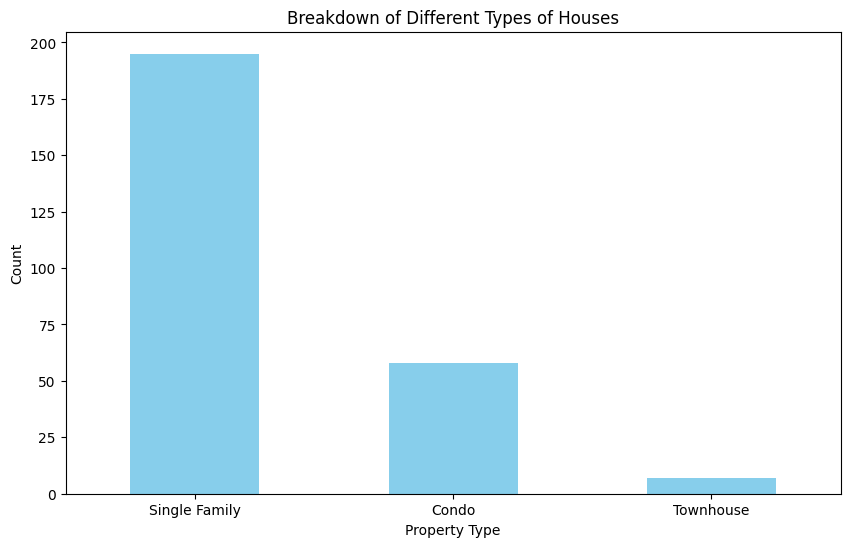

In [53]:
import matplotlib.pyplot as plt

property_counts = filtered_df['PropType'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6)) 
property_counts.plot(kind='bar', color='skyblue') 
plt.title('Breakdown of Different Types of Houses')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

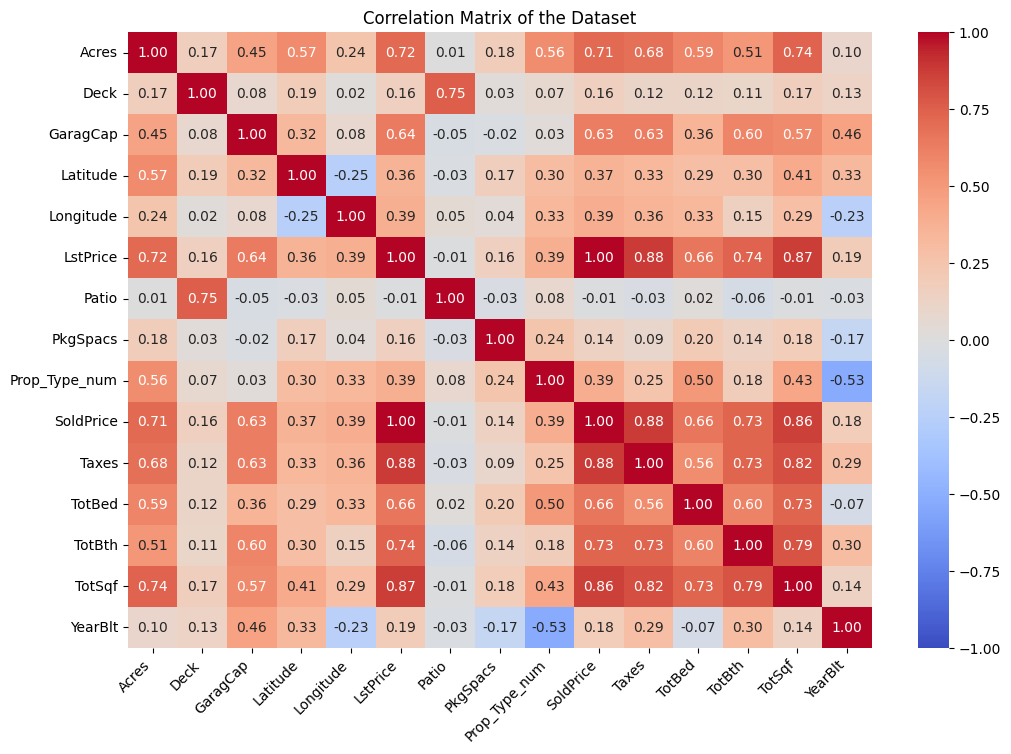

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_keep = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 
                   'PkgSpacs', 'Prop_Type_num', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 
                   'YearBlt']
filtered_df = filtered_df[columns_to_keep]

# Compute the correlation matrix
correlation_matrix = filtered_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

plt.title('Correlation Matrix of the Dataset')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()


In [ ]:

columns = ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']
subset_df = filtered_df[columns]

# Create scatter plot matrix
sns.pairplot(subset_df)

plt.suptitle('Scatter Plot Matrix of Selected Variables', y=1.02)  

# Show the plot
plt.show()


#### Findings: 
- LstPrice and SoldPrice: There is a strong positive correlation, this makes sense as the selling price would generally follow the listing price closely.
- TotSqf (Total Square Feet) and SoldPrice: There is a positive correlation here, this makes sense since larger houses tend to sell for higher prices.
- Taxes and SoldPrice: There is a positive correlation here, this makes sense since higher-priced homes will have higher taxes.
- Prop_Type and Year Built: There is a negative correlation here, suggests that newer properties are more likely to be condos and townhouses, reflecting recent trends in urban development and housing preferences.

#### Task 4: Geospatial plot

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_df['Longitude'], filtered_df['Latitude'], 
                      c=filtered_df['SoldPrice'], cmap='viridis', alpha=0.6)

plt.colorbar(scatter, label='Sold Price ($)')

plt.title('Property Prices by Location in Salt Lake City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


#### Relation between the location and the house price
Houses that are north, east SLC (so closer to the Wasatch mountains) are more expensive. As you go south, west the houses get cheaper. 

### Task 5: Simple Linear Regression

In [ ]:
import statsmodels.api as sm

# Add a constant term for the intercept (beta_0)
X = sm.add_constant(filtered_df['LstPrice'])
y = filtered_df['SoldPrice']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())



**R Squared:** 0.990
This is a high R^2, suggesting list price explains the variations in the dependent variable sold price very well. 

**Beta_1:** .9441
This suggests that for every dollar increase in the List Price, the Sold Price increases by approximately 94.41 cents. This value is close to 1 indicates that the List Price is a very strong predictor of the Sold Price


In [ ]:
# Plot the actual data points
plt.scatter(filtered_df['LstPrice'], filtered_df['SoldPrice'], alpha=0.5, label='Actual data')

# Predict and plot the regression line
predictions = model.predict(X)
plt.plot(filtered_df['LstPrice'], predictions, color='red', label='Fitted line')

plt.title('List Price vs Sold Price with Regression Line')
plt.xlabel('List Price')
plt.ylabel('Sold Price')
plt.legend()

plt.show()


### Task 6: Multilinear Regression

In [ ]:
import statsmodels.api as sm

# Select predictors - excluding 'LstPrice' and 'Prop_Type'
X = filtered_df[['TotSqf', 'GaragCap', 'Latitude', 'Longitude', 'TotBed', 'TotBth', 'YearBlt', 'Acres', 'Taxes']]
# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Dependent variable
y = filtered_df['SoldPrice']

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())


### Variables Chosen:
- `TotSqf`, `GaragCap`, `Latitude`, `Longitude`, `TotBed`, `TotBth`, `YearBlt`, `Acres`, `Taxes`

### Detailed Coefficient Analysis:
- **TotSqf (Total Square Feet)**
    - **Coefficient:** 43.1788
    - **Interpretation:** Has a positive and strongly significant coefficient (p-value = 0.000). Each additional square foot increases the SoldPrice by approximately 43.18 USD. This indicates that larger homes tend to sell for more, which is expected in real estate valuations.
- **GaragCap (Garage Capacity)**
    - **Coefficient:** 23,030
    - **Interpretation:** Has a positive and strongly significant coefficient (p-value = 0.001). Each additional garage space adds about 23,030 USD to the SoldPrice of the house. This highlights the buyer preferences for garage spaces, thus adding to the property value.
- **Latitude and Longitude**
    - **Latitude Coefficient:** 1,799,000
    - **Longitude Coefficient:** 1,535,000
    - **Interpretation:** Both latitude and longitude add roughly 1.5 million USD, indicating geographical location impacts house prices. Specifically, properties located at higher latitudes and longitudes reflect proximity to the Wasatch front, increasing property value.
- **TotBed (Total Bedrooms)**
    - **Coefficient:** 9367.31
    - **Interpretation:** Each additional bedroom increases the SoldPrice by approximately 9367.31 USD. This indicates that homes with more bedrooms tend to sell for more.
- **TotBth (Total Bathrooms)**
    - **Coefficient:** 6956
    - **Interpretation:** The coefficient is large, but not statistically significant (p-value = 0.387), suggesting variability in how many bathrooms a house has contributes to the house's price.
- **YearBlt (Year Built)**
    - **Coefficient:** -194.6567
    - **Interpretation:** The coefficient is negative (-194.66 USD), suggesting that older houses tend to sell for less, although it's not statistically significant (p-value: 0.249).
- **Acres**
    - **Coefficient:** 72,690
    - **Interpretation:** The coefficient is large, but is not statistically significant (p-value: 0.281), suggesting variability in how much land contributes to the house's price.
- **Taxes**
    - **Coefficient:** 48.8195
    - **Interpretation:** Has a positive coefficient of 48.82 USD per unit, strongly significant (p < 0.001), indicating that higher taxes are associated with higher sold prices.

### Model's R-squared: 0.847
- **Interpretation:** This is decently high and shows that about 84.7% of the variability in SoldPrice is explained by the variables included in my model. This is a great fit, though not as high as the simple linear regression with LstPrice alone, which was close to 99%.


### Task 7: Incorporating a categorical variable

In [ ]:

# Define a mapping for property types for visualization
prop_type_mapping = {0: 'Condo/Townhouse', 1: 'Single Family Home'}
filtered_df['Prop_Type'] = filtered_df['Prop_Type_num'].map(prop_type_mapping)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='TotSqf', y='SoldPrice', hue='Prop_Type', palette='bright', alpha=0.6)
plt.title('Total Square Feet vs Sold Price by Property Type')
plt.xlabel('Total Square Feet')
plt.ylabel('Sold Price')
plt.legend(title='Property Type')
plt.show()


### Explanation:

**Confounder:** TotSqf acts as a confounder because it is correlated both with the property type (different types of properties typically have different
 'sizes) and the sold price (larger properties generally sell for more).
 
**Effect of Confounder:** By including TotSqf in the model, it absorbs much of the effect initially attributed to Prop_Type_num, revealing that the key factor affecting price differences among these properties might be their size rather than purely their type.